<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">Title: Sales Prediction</h1>

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Mubashir</h1>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-mubashir-4441072ba/)


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:mubashir.dev.02@gmail.com)


# **Introduction**
In this notebook we will be predicting sales on the basis of expenditure features such as TV, newspaper, and radio.

# **Libraries**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

# **Load Data**

In [98]:
df = pd.read_csv('./Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# **EDA & Visualization**

In [99]:
# print the columns of the dataset
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [100]:
# Rename the column Unnamed to id
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
df.head()

,Id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [101]:
# shape of the data
df.shape

(200, 5)

In [102]:
# get the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [103]:
# check for null values
df.isnull().sum().sort_values(ascending=False)

Id           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [104]:
# print the descriptive summary
df.describe()

,Id,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Standardizing the data

In [105]:
# extract X and y
X = df.drop(columns=['Id', 'Sales'], axis=1)
y = df['Sales']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Correlation Matrix (Heatmap)

<Axes: >

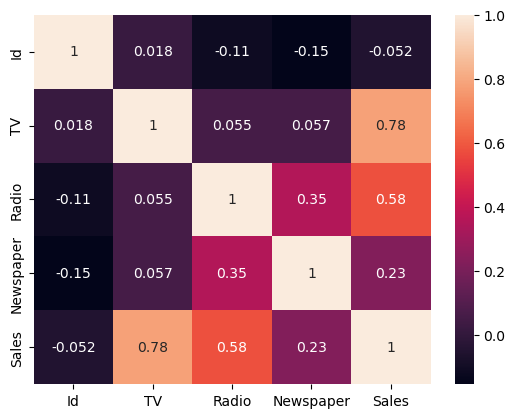

In [106]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True)

- TV feature effects more on Sales i.e 78% 

## Histogram of Scaled and Unscaled Data

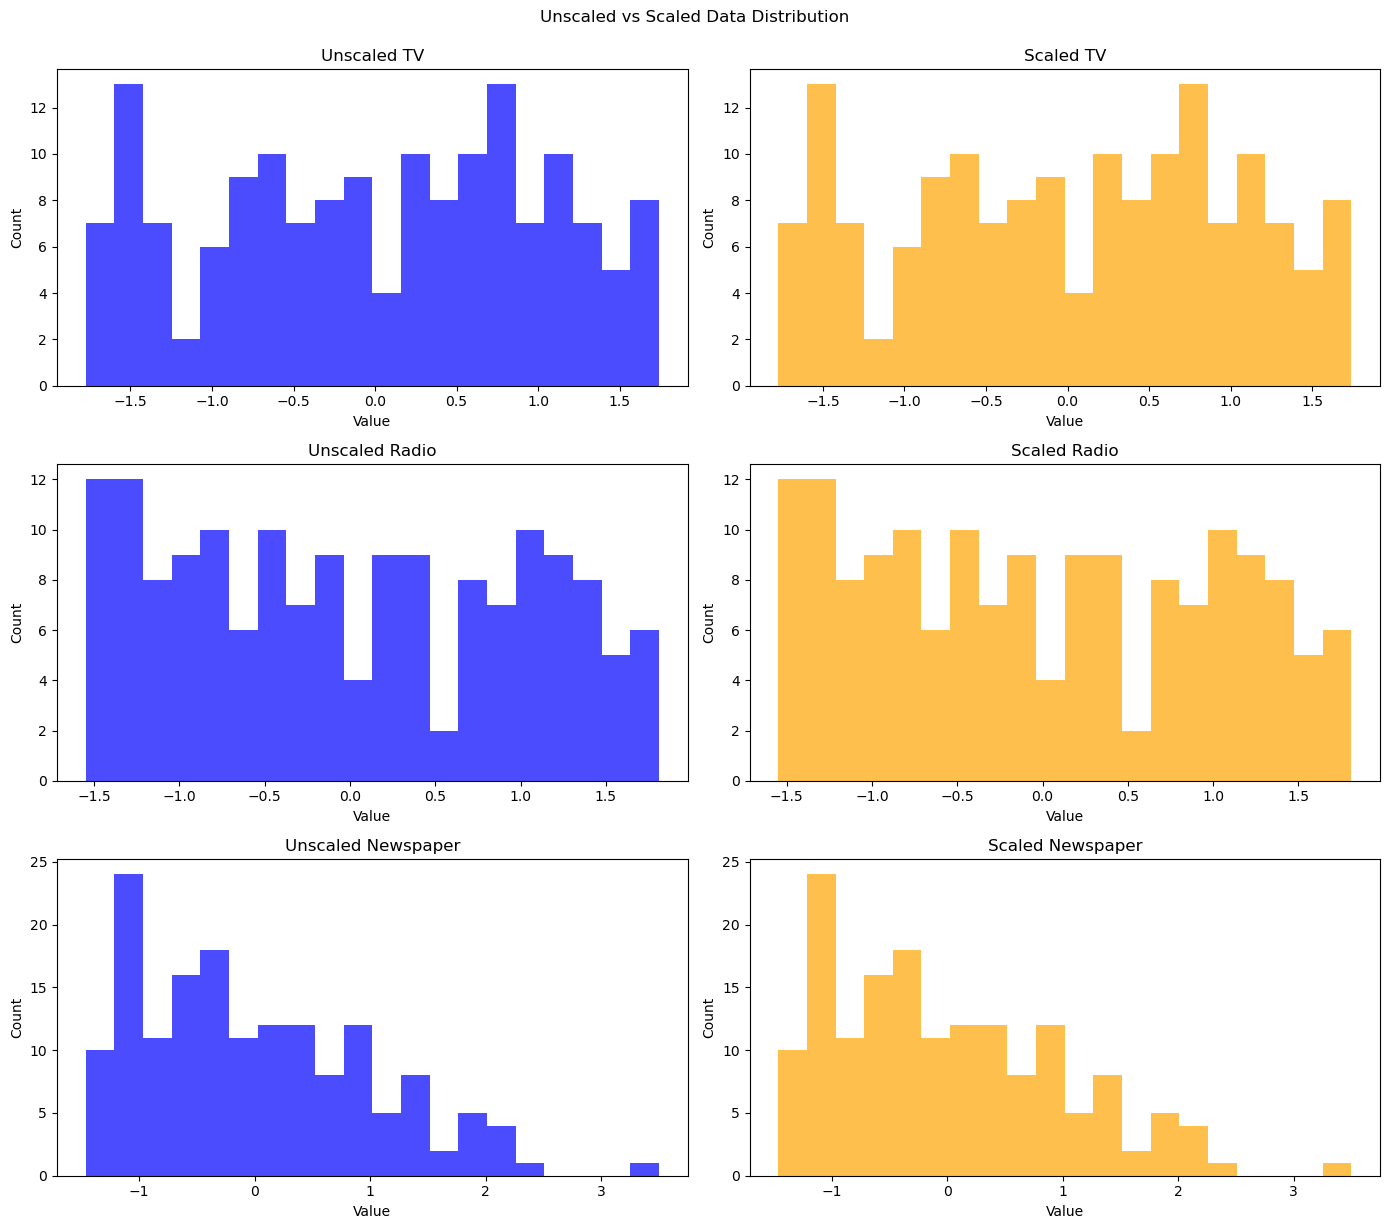

In [107]:
# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test, columns=X.columns)

# Convert the un scaled arrays back to DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

num_features = len(X.columns)
fig, axes = plt.subplots(num_features, 2, figsize=(14, num_features * 4))

# Plot histograms
for i, col in enumerate(X.columns):
    # Unscaled data
    axes[i, 0].hist(X_train_df[col], bins=20, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Unscaled {col}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Count')

    # Scaled data
    axes[i, 1].hist(X_train_scaled_df[col], bins=20, color='orange', alpha=0.7)
    axes[i, 1].set_title(f'Scaled {col}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.suptitle('Unscaled vs Scaled Data Distribution', y=1.02)
plt.show()

## Pairplot 

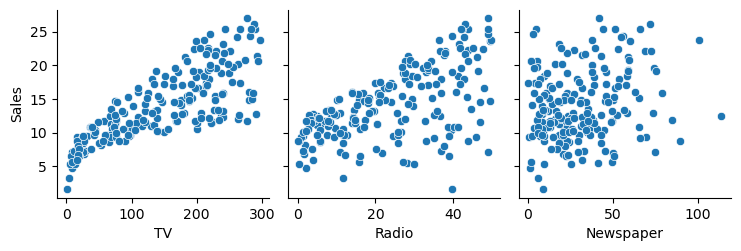

In [108]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()

# **Model Selection**
1- Linear Regression\
2- Random Forest\
3- Gradient Boosting\
4- Support Vector Machine\
5- K-Nearest Neighbors\
6- Decision Tree\
7- Ada Boost\
8- Xgboost

In [109]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Machine', SVR()),
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Ada Boost', AdaBoostRegressor(random_state=42)),
    ('XGBRegressor', XGBRegressor())
]

# Initialize variables to track the best model and its metrics
best_model = None
best_mse = np.inf  # Initialize with infinity
best_r2 = -np.inf  # Initialize with negative infinity

# Initialize lists to store the results
model_names = []
mse_scores = []
r2_scores = []

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross-validation
    mse = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Mean Squared Error:", mse)
    print("Cross-validation R-squared:", r2)
    print()
    
    # Store the results
    model_names.append(name)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # Check if the current model has the best MSE
    if mse < best_mse:
        best_mse = mse
        best_model = pipeline

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mse_scores,
    'R-squared': r2_scores
})

# Select the best model based on MSE
best_model_name = results_df.loc[results_df['Mean Squared Error'].idxmin(), 'Model']
best_model_row = results_df.loc[results_df['Model'] == best_model_name]

# Print the best model and its metrics
print("\nBest Model (Based on Mean Squared Error):")
print(best_model_row)
print()

Model: Random Forest
Cross-validation Mean Squared Error: 0.6852777187499994
Cross-validation R-squared: 0.9692199926241318

Model: Gradient Boosting
Cross-validation Mean Squared Error: 0.6667051287081023
Cross-validation R-squared: 0.9698141244584185

Model: Support Vector Machine
Cross-validation Mean Squared Error: 3.636580684892757
Cross-validation R-squared: 0.8399702797989486

Model: Linear Regression
Cross-validation Mean Squared Error: 2.9433926025900408
Cross-validation R-squared: 0.8594884313276513

Model: K-Nearest Neighbors
Cross-validation Mean Squared Error: 2.06091
Cross-validation R-squared: 0.9040350696327097

Model: Decision Tree
Cross-validation Mean Squared Error: 1.4832499999999995
Cross-validation R-squared: 0.9379917962036435

Model: Ada Boost
Cross-validation Mean Squared Error: 1.2108641461322514
Cross-validation R-squared: 0.9469917153401012

Model: XGBRegressor
Cross-validation Mean Squared Error: 0.811372918332429
Cross-validation R-squared: 0.9649636678873

In [120]:
# Display the results DataFrame
print("Results:")
print(results_df)

Results:
                    Model  Mean Squared Error  R-squared
0           Random Forest            0.685278   0.969220
1       Gradient Boosting            0.666705   0.969814
2  Support Vector Machine            3.636581   0.839970
3       Linear Regression            2.943393   0.859488
4     K-Nearest Neighbors            2.060910   0.904035
5           Decision Tree            1.483250   0.937992
6               Ada Boost            1.210864   0.946992
7            XGBRegressor            0.811373   0.964964


## Model Training

In [111]:
# Train the best model (Gradient Boosting Model)
best_model.fit(X_train, y_train)
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = best_model.predict(X_test)
print("Predicted Sales:", predicted_sales)
print("Mean Squared Error = ", mean_squared_error(predicted_sales, y_test))

Predicted Sales: [17.4193688  21.75323977 20.26621166  6.51567214 23.61986725 13.04853214
 22.85250461  9.43520333 11.90058482 15.87305362  8.05898068  9.21333113
 12.35617327  4.59831619 10.40360207 12.11962088  6.22599474 16.52059978
 11.42311669 19.08584766 20.35905024 13.2002411   9.83436209 22.84129014
 10.13026599  8.92445042 22.88423501 12.69859929 10.27818216  5.51282797
 11.3745662  11.38200584 21.8829402   8.56165802 15.62454913 20.73819568
 12.22932586 20.23884167 12.29420266  7.27484813]
Mean Squared Error =  0.5321649894213744


# **Inference**

In [118]:
# Make predictions on new data

new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
new_data = scaler.transform(new_data)
predicted_sales = best_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [15.02591187]


In [119]:
# Make predictions on new data

new_data = pd.DataFrame({'TV': [1000], 'Radio': [2000], 'Newspaper': [3000]})
new_data = scaler.transform(new_data)
predicted_sales = best_model.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [26.64536095]


# **Conclusion**

`Overall Gradient Boosting and Random Forest perform well, we choose Gradient Boosting because it is at the top according to the mean square error and r-squared.`